<a href="https://colab.research.google.com/github/thlearningcoder/Phishing_Email/blob/main/Phishing_URL_Checker%5B1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phishing URL Checker

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 11.8 MB/s eta 0:00:00


In [ ]:
# Importing requried models
# Data preprocessing libraries
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Deep learning models libraries
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, Input, Flatten, Conv2D, MaxPooling2D, SimpleRNN
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils, to_categorical

# Evalution measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import metrics

# Saving the models
import pickle

## Loading the Final Pre-processed Dataset

In [ ]:
final_dataset = pd.read_csv("/content/phishing_after_preprocess.csv")
final_dataset.drop('id',axis=1,inplace=True)
final_dataset['Result'] = final_dataset['Result'].replace(-1, 0)

# print(final_dataset.head())
# print(final_dataset.shape)
# print(final_dataset.dtypes)

In [ ]:
final_dataset['Result'].value_counts()

1    6157
0    4898
Name: Result, dtype: int64

In [ ]:
# Dividing the dataset into train and test data for model training and evaluation
X = final_dataset.drop('Result', axis=1)
y = final_dataset['Result']
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# print(len(train_data))
# print(len(train_labels))
# print(len(test_data))
# print(len(test_labels))

In [ ]:
# Count the number of instances for each class
class_counts_before = train_labels.value_counts()

# Print the number of samples in each class before SMOTE
print("Number of samples in each class before SMOTE on train data:", class_counts_before)

# Create an instance of SMOTE
smote = SMOTE()

# Apply SMOTE to the data
train_data, train_labels = smote.fit_resample(train_data, train_labels)

# Count the number of instances for each class
class_counts_after = train_labels.value_counts()

# Print the number of samples in each class after SMOTE
print("Number of samples in each class after SMOTE on train data:", class_counts_after)

class_counts_before = pd.DataFrame(data={"Result": ["Legitimate", "Phishing"], "count": [class_counts_before[1], class_counts_before[0]]})
class_counts_after = pd.DataFrame(data={"Result": ["Legitimate", "Phishing"], "count": [class_counts_after[1], class_counts_after[0]]})

Number of samples in each class before SMOTE on train data: 1    4902
0    3942
Name: Result, dtype: int64
Number of samples in each class after SMOTE on train data: 1    4902
0    4902
Name: Result, dtype: int64


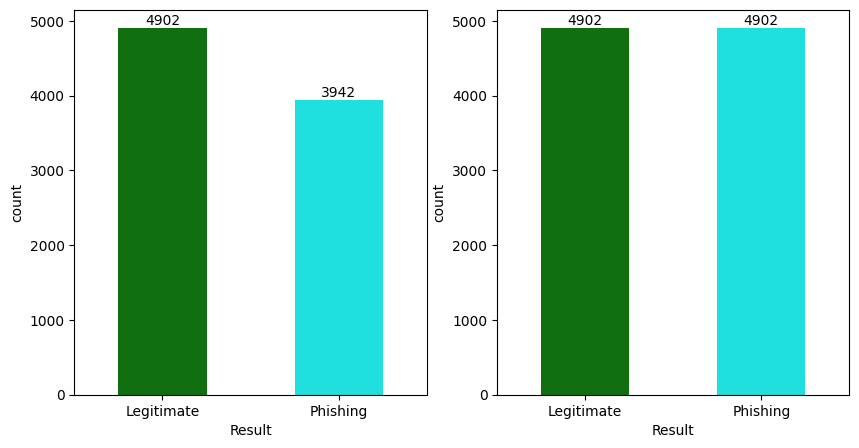

In [ ]:
# Countplot [Before and after]
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))

sns.barplot(ax=axes[0], y="count", x="Result", data=class_counts_before, palette = ["green", "aqua"], orient="v", width=0.5)

for i in axes[0].containers:
    axes[0].bar_label(i,)

sns.barplot(ax=axes[1], y="count", x="Result", data=class_counts_after, palette = ["green", "aqua"], orient="v", width=0.5)

for i in axes[1].containers:
    axes[1].bar_label(i,)

plt.show()

# Machine Learning Models

In [ ]:
ml_names = ['lr', 'nb', 'dt', 'svm', 'knn']

### 1. Logistic Regression

In [ ]:
# Fit logistic regression model
model_lr = LogisticRegression(solver='lbfgs', max_iter=1000)
model_lr.fit(train_data, train_labels)

LogisticRegression(max_iter=1000)

In [ ]:
cm = confusion_matrix(train_data, train_labels)
print ("Confusion Matrix for training : \n",cm)

acc = accuracy_score(train_data, train_labels)*100
print("Accuracy for training : ",acc)

precision = metrics.precision_score(train_data, train_labels)
print("Precision for training : ",precision)

recall = recall_score(train_data, train_labels)
print("Recall for training : ",recall)

f1_score = metrics.f1_score(train_data, train_labels)
print("F1-Score for training : ",f1_score)

print(classification_report(train_data, train_labels))

ValueError: ignored

### 2. Naive Bayes

In [ ]:
# Fit Gaussian Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(train_data, train_labels)

GaussianNB()

### 3. Decision Tree

In [ ]:
# Fit Decision Tree model
model_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
model_dt.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=3, random_state=42)

### 4. Support Vector Machines

In [ ]:
# Fit Support Vector Machine Classifier (SVM) model
model_svm = SVC(kernel='linear', C=1, random_state=42, probability=True)
model_svm.fit(train_data, train_labels)

SVC(C=1, kernel='linear', probability=True, random_state=42)

### 5. K-Nearest Neighbors

In [ ]:
# Fit K-Nearest Neighbors model
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(train_data, train_labels)

KNeighborsClassifier(n_neighbors=10)

# Ensemble Learning models

In [ ]:
em_names = ['rf', 'bagging', 'xgb', 'ada', 'cb', 'gb', 'stacking', "vh", "vs", "blend"]

# Create a list of the models to be ensembled
em_models = [('lr', model_lr), ('nb', model_nb), ('dt', model_dt), ('svm', model_svm), ('knn', model_knn)]

### 1. Random Forest

In [ ]:
# Fit Random forest model
model_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model_rf.fit(train_data, train_labels)

RandomForestClassifier(max_depth=3, random_state=42)

### 2. Bagging

In [ ]:
# Aggregate the predictions made by each BaggingClassifier
y_preds = []
for name, model in em_models:
    # Create a BaggingClassifier object for the current model
    bagging_model = BaggingClassifier(model, n_estimators=10, max_samples=0.8, random_state=42)
    
    # Train the BaggingClassifier on the training set
    bagging_model.fit(train_data, train_labels)

    # Make predictions on the testing set
    y_pred = bagging_model.predict_proba(test_data)[:, 1]
    
    # Append the predicted probabilities to the list of predictions
    y_preds.append(y_pred)

# Aggregate the predictions using weighted voting
weights = [0.2, 0.2, 0.2, 0.2, 0.2]
model_bagging = np.average(y_preds, axis=0, weights=weights)

### 3. XGBoost

In [ ]:
# Fit XGboost model
model_xgb = xgb.XGBClassifier()
model_xgb.fit(train_data, train_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### 4. Adaboost

In [ ]:
# Create an AdaBoost classifier with 50 estimators
model_ada = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the AdaBoost classifier to the training data
model_ada.fit(train_data, train_labels)

AdaBoostClassifier(random_state=42)

### 5. Catboost

In [ ]:
# Create an instance of the CatBoostClassifier
model_cb = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

# Fit the model on the training data
model_cb.fit(train_data, train_labels)

0:	learn: 0.5324410	total: 144ms	remaining: 14.3s
1:	learn: 0.4410140	total: 150ms	remaining: 7.35s
2:	learn: 0.3684891	total: 155ms	remaining: 5.02s
3:	learn: 0.3112870	total: 160ms	remaining: 3.85s
4:	learn: 0.2815710	total: 166ms	remaining: 3.15s
5:	learn: 0.2545360	total: 171ms	remaining: 2.68s
6:	learn: 0.2345690	total: 176ms	remaining: 2.34s
7:	learn: 0.2177465	total: 181ms	remaining: 2.08s
8:	learn: 0.2012072	total: 186ms	remaining: 1.88s
9:	learn: 0.1895561	total: 191ms	remaining: 1.72s
10:	learn: 0.1793486	total: 196ms	remaining: 1.59s
11:	learn: 0.1730270	total: 202ms	remaining: 1.48s
12:	learn: 0.1671964	total: 208ms	remaining: 1.39s
13:	learn: 0.1627445	total: 213ms	remaining: 1.31s
14:	learn: 0.1594325	total: 219ms	remaining: 1.24s
15:	learn: 0.1550009	total: 224ms	remaining: 1.17s
16:	learn: 0.1521465	total: 229ms	remaining: 1.12s
17:	learn: 0.1493404	total: 234ms	remaining: 1.06s
18:	learn: 0.1460430	total: 240ms	remaining: 1.02s
19:	learn: 0.1435994	total: 245ms	remaini

### 6. Gradient Boosting

In [ ]:
# Create a Gradient Boosting Classifier object
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting Classifier on the training set
model_gb.fit(train_data, train_labels)

GradientBoostingClassifier(random_state=42)

### 7. Stacking

In [ ]:
model_stacking = StackingClassifier(estimators=em_models, final_estimator=LogisticRegression())

# Fit the stacking model on the training data
model_stacking.fit(train_data, train_labels)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('nb', GaussianNB()),
                               ('dt',
                                DecisionTreeClassifier(max_depth=3,
                                                       random_state=42)),
                               ('svm',
                                SVC(C=1, kernel='linear', probability=True,
                                    random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10))],
                   final_estimator=LogisticRegression())

### 8. Voting [Hard]

In [ ]:
# Define the voting classifier with hard voting
model_vh = VotingClassifier(estimators=em_models, voting='hard')

# Fit the models on the training data
model_vh.fit(train_data, train_labels)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', GaussianNB()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=10))])

### 9. Voting [Soft]

In [ ]:
# Define the voting classifier with soft voting
model_vs = VotingClassifier(estimators=em_models, voting='soft')

# Fit the models on the training data
model_vs.fit(train_data, train_labels)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', GaussianNB()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=10))],
                 voting='soft')

### 10. Blending

In [ ]:
# Splitting the train data into train and val set
train_set, val_set, train_set_labels, val_set_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=0)

# print(len(train_set))
# print(len(train_set_labels))
# print(len(val_set))
# print(len(val_set_labels))
# print(len(test_data))
# print(len(test_labels))

In [ ]:
base_predictions = []
meta_predictions = []

for name, model in em_models:
    model.fit(train_set, train_set_labels)
    base_prediction = model.predict(val_set)
    meta_prediction = model.predict(test_data)
    
    base_prediction = base_prediction.reshape(len(base_prediction), 1)
    meta_prediction = meta_prediction.reshape(len(meta_prediction), 1)
    
    base_predictions.append(base_prediction)
    meta_predictions.append(meta_prediction)

base_predictions = np.hstack(base_predictions)
meta_predictions = np.hstack(meta_predictions)

model_blend = LogisticRegression()
model_blend.fit(base_predictions, val_set_labels)

LogisticRegression()

# Deep Learning Models

In [ ]:
dl_names = ["ann", "mlp", "rnn", "lstm", "gru"]

In [ ]:
# Reshape the features to 2D tensor shape (batch_size, num_features)
train_data_2d = train_data.values
test_data_2d = test_data.values

### 1. ANN

In [ ]:
# Define the model architecture
model_ann = Sequential()
model_ann.add(Dense(15, input_dim=train_data_2d.shape[1], activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(15, activation='relu'))
model_ann.add(Dropout(0.4))
model_ann.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_ann.fit(train_data_2d, train_labels, validation_data=(test_data_2d, test_labels), epochs=500, batch_size=33, verbose=1)
model_ann.summary()

Epoch 1/500
298/298 [==============================] - 3s 5ms/step - loss: 0.5419 - accuracy: 0.7119 - val_loss: 0.2829 - val_accuracy: 0.9032
Epoch 2/500
298/298 [==============================] - 1s 4ms/step - loss: 0.3029 - accuracy: 0.8898 - val_loss: 0.2191 - val_accuracy: 0.9159
Epoch 3/500
298/298 [==============================] - 1s 5ms/step - loss: 0.2509 - accuracy: 0.9101 - val_loss: 0.2052 - val_accuracy: 0.9195
Epoch 4/500
298/298 [==============================] - 1s 4ms/step - loss: 0.2335 - accuracy: 0.9157 - val_loss: 0.1899 - val_accuracy: 0.9258
Epoch 5/500
298/298 [==============================] - 1s 4ms/step - loss: 0.2190 - accuracy: 0.9218 - val_loss: 0.1853 - val_accuracy: 0.9290
Epoch 6/500
298/298 [==============================] - 1s 4ms/step - loss: 0.2058 - accuracy: 0.9266 - val_loss: 0.1798 - val_accuracy: 0.9290
Epoch 7/500
298/298 [==============================] - 1s 5ms/step - loss: 0.2009 - accuracy: 0.9257 - val_loss: 0.1751 - val_accuracy: 0.9285

### 2. MLP

In [ ]:
# Create an MLP classifier with two hidden layers of 50 neurons each
model_mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# Train the MLP classifier on the training set
model_mlp.fit(train_data_2d, train_labels)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [ ]:
# Reshape the features to 3D tensor shape (batch_size, time_steps, num_features)
train_data_3d = train_data_2d.reshape(-1, 1, train_data_2d.shape[1])
test_data_3d = test_data_2d.reshape(-1, 1, test_data_2d.shape[1])

### 3. Simple RNN

In [ ]:
# Define the model architecture
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, input_shape=(train_data_3d.shape[1], train_data_3d.shape[2]), return_sequences=True))
model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_rnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_rnn.fit(train_data_3d, train_labels, validation_data=(test_data_3d, test_labels), epochs=500, batch_size=33)
model_rnn.summary()

Epoch 1/500
298/298 [==============================] - 5s 7ms/step - loss: 0.2701 - accuracy: 0.8910 - val_loss: 0.1943 - val_accuracy: 0.9222
Epoch 2/500
298/298 [==============================] - 2s 5ms/step - loss: 0.1942 - accuracy: 0.9229 - val_loss: 0.1881 - val_accuracy: 0.9290
Epoch 3/500
298/298 [==============================] - 2s 5ms/step - loss: 0.1857 - accuracy: 0.9247 - val_loss: 0.1821 - val_accuracy: 0.9281
Epoch 4/500
298/298 [==============================] - 2s 6ms/step - loss: 0.1823 - accuracy: 0.9273 - val_loss: 0.1759 - val_accuracy: 0.9299
Epoch 5/500
298/298 [==============================] - 2s 6ms/step - loss: 0.1788 - accuracy: 0.9281 - val_loss: 0.1750 - val_accuracy: 0.9290
Epoch 6/500
298/298 [==============================] - 2s 6ms/step - loss: 0.1735 - accuracy: 0.9343 - val_loss: 0.1825 - val_accuracy: 0.9245
Epoch 7/500
298/298 [==============================] - 2s 6ms/step - loss: 0.1703 - accuracy: 0.9302 - val_loss: 0.1677 - val_accuracy: 0.9326

### 4. LSTM

In [ ]:
# Define the model architecture
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(train_data_3d.shape[1], train_data_3d.shape[2]), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(train_data_3d, train_labels, validation_data=(test_data_3d, test_labels), epochs=500, batch_size=33)
model_lstm.summary()

Epoch 1/500
298/298 [==============================] - 10s 12ms/step - loss: 0.3019 - accuracy: 0.8958 - val_loss: 0.1997 - val_accuracy: 0.9236
Epoch 2/500
298/298 [==============================] - 2s 8ms/step - loss: 0.1885 - accuracy: 0.9298 - val_loss: 0.1858 - val_accuracy: 0.9281
Epoch 3/500
298/298 [==============================] - 2s 8ms/step - loss: 0.1706 - accuracy: 0.9329 - val_loss: 0.1809 - val_accuracy: 0.9231
Epoch 4/500
298/298 [==============================] - 2s 8ms/step - loss: 0.1616 - accuracy: 0.9344 - val_loss: 0.1684 - val_accuracy: 0.9331
Epoch 5/500
298/298 [==============================] - 2s 8ms/step - loss: 0.1527 - accuracy: 0.9379 - val_loss: 0.1709 - val_accuracy: 0.9263
Epoch 6/500
298/298 [==============================] - 2s 8ms/step - loss: 0.1442 - accuracy: 0.9406 - val_loss: 0.1508 - val_accuracy: 0.9349
Epoch 7/500
298/298 [==============================] - 2s 8ms/step - loss: 0.1351 - accuracy: 0.9457 - val_loss: 0.1462 - val_accuracy: 0.93

### 5. GRU

In [ ]:
# Define the model architecture
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=(train_data_3d.shape[1], train_data_3d.shape[2]), return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(32))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_gru.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_gru.fit(train_data_3d, train_labels, validation_data=(test_data_3d, test_labels), epochs=500, batch_size=33)
model_gru.summary()

Epoch 1/500
298/298 [==============================] - 12s 13ms/step - loss: 0.2824 - accuracy: 0.8964 - val_loss: 0.1922 - val_accuracy: 0.9240
Epoch 2/500
298/298 [==============================] - 2s 8ms/step - loss: 0.1861 - accuracy: 0.9279 - val_loss: 0.1860 - val_accuracy: 0.9294
Epoch 3/500
298/298 [==============================] - 2s 8ms/step - loss: 0.1736 - accuracy: 0.9293 - val_loss: 0.1867 - val_accuracy: 0.9276
Epoch 4/500
298/298 [==============================] - 2s 8ms/step - loss: 0.1632 - accuracy: 0.9357 - val_loss: 0.1658 - val_accuracy: 0.9349
Epoch 5/500
298/298 [==============================] - 2s 8ms/step - loss: 0.1543 - accuracy: 0.9377 - val_loss: 0.1628 - val_accuracy: 0.9313
Epoch 6/500
298/298 [==============================] - 2s 8ms/step - loss: 0.1458 - accuracy: 0.9406 - val_loss: 0.1581 - val_accuracy: 0.9322
Epoch 7/500
298/298 [==============================] - 2s 8ms/step - loss: 0.1412 - accuracy: 0.9419 - val_loss: 0.1491 - val_accuracy: 0.93

# Evaluating model performance using evaluation metrics

In [ ]:
model_names = ml_names + em_names + dl_names

def eval_function():
    for model in model_names:
        name = model
        
        if name == "blend":
            model_prediction = eval(f"model_{model}.predict(meta_predictions)")
        elif name == "bagging":
            model_prediction = np.round(eval(f"model_{model}"))
        elif name == "vs":
            model_proba = eval(f"model_{model}.predict_proba(test_data)")
            model_prediction = np.argmax(model_proba, axis=1)
        elif name == "ann":
            model_prediction = np.where(eval(f"model_{model}.predict(test_data_2d)")> 0.5, 1, 0)
        elif name == "rnn" or name == "lstm" or name == "gru":
            model_prediction = np.where(eval(f"model_{model}.predict(test_data_3d)")> 0.5, 1, 0)
        else:
            model_prediction = eval(f"model_{model}.predict(test_data)")
        
        model_cm = confusion_matrix(test_labels, model_prediction)    
        tn, fp, fn, tp = model_cm.ravel()
        
        model_accuracy = accuracy_score(test_labels, model_prediction)
        model_misclassification = 1 - accuracy_score(test_labels, model_prediction)
        model_precision = precision_score(test_labels, model_prediction)
        model_recall = recall_score(test_labels, model_prediction)
        model_f1 = f1_score(test_labels, model_prediction)

        print(f"Confusion matrix of the model {name} : \n{model_cm}")
        print(f'True Negative of the model {name} -> {tn}')
        print(f'False Positive of the model {name} -> {fp}')
        print(f'False Negative of the model {name} -> {fn}')
        print(f'True Positive of the model {name} -> {tp}')
        print(f"Accuracy of the model {name} -> {model_accuracy}")
        print(f"Misclassification rate of the model {name} -> {model_misclassification}")
        print(f"Precision of the model {name} -> {model_precision}")
        print(f"Recall of the model {name} -> {model_recall}")
        print(f"F1 Measure of the model {name} -> {model_f1}")
        print("\n")


eval_function()
print("\n")

Confusion matrix of the model lr : 
[[ 868   88]
 [  85 1170]]
True Negative of the model lr -> 868
False Positive of the model lr -> 88
False Negative of the model lr -> 85
True Positive of the model lr -> 1170
Accuracy of the model lr -> 0.9217548620533695
Misclassification rate of the model lr -> 0.07824513794663046
Precision of the model lr -> 0.9300476947535771
Recall of the model lr -> 0.9322709163346613
F1 Measure of the model lr -> 0.931157978511739


Confusion matrix of the model nb : 
[[955   1]
 [909 346]]
True Negative of the model nb -> 955
False Positive of the model nb -> 1
False Negative of the model nb -> 909
True Positive of the model nb -> 346
Accuracy of the model nb -> 0.5884215287200362
Misclassification rate of the model nb -> 0.41157847127996383
Precision of the model nb -> 0.9971181556195965
Recall of the model nb -> 0.2756972111553785
F1 Measure of the model nb -> 0.4319600499375781


Confusion matrix of the model dt : 
[[ 865   91]
 [  79 1176]]
True Negative

C:\Users\chand\Python_Environment\python\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


70/70 [==============================] - 0s 2ms/step
Confusion matrix of the model rnn : 
[[ 913   43]
 [  30 1225]]
True Negative of the model rnn -> 913
False Positive of the model rnn -> 43
False Negative of the model rnn -> 30
True Positive of the model rnn -> 1225
Accuracy of the model rnn -> 0.9669832654907282
Misclassification rate of the model rnn -> 0.03301673450927178
Precision of the model rnn -> 0.9660883280757098
Recall of the model rnn -> 0.9760956175298805
F1 Measure of the model rnn -> 0.9710661910424098


70/70 [==============================] - 0s 2ms/step
Confusion matrix of the model lstm : 
[[ 917   39]
 [  28 1227]]
True Negative of the model lstm -> 917
False Positive of the model lstm -> 39
False Negative of the model lstm -> 28
True Positive of the model lstm -> 1227
Accuracy of the model lstm -> 0.9696969696969697
Misclassification rate of the model lstm -> 0.030303030303030276
Precision of the model lstm -> 0.9691943127962085
Recall of the model lstm -> 0.977

# Saving the trained models

### Machine learning models

In [ ]:
for model in ml_names:
    with open(f'ml_models/model_{model}.pkl', 'wb') as f:
        pickle.dump(model, f)

### Ensemble learning models

In [ ]:
for model in em_names:
    with open(f'em_models/model_{model}.pkl', 'wb') as f:
        pickle.dump(model, f)

NameError: ignored

### Deep learning models

In [ ]:
for model in dl_names:
    if model == "mlp":
        with open(f'dl_models/model_{model}.pkl', 'wb') as f:
            pickle.dump(model, f)
    else:
        eval(f"model_{model}.save('dl_models\model_{model}.h5')")

NameError: ignored